In [80]:
%matplotlib inline
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from spacy.tokenizer import Tokenizer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import HashingVectorizer

In [81]:
FOLDER = "/home/oscar/GitHub/test_used_tl_ML/data/"

In [82]:
df_num = pd.read_pickle(FOLDER + "df_num_norm.pkl")

In [83]:
df_num.tail()

listing_type_id_bronze  listing_type_id_free  listing_type_id_gold  \
95950                       1                     0                     0   
95951                       0                     1                     0   
95952                       1                     0                     0   
95953                       1                     0                     0   
95954                       1                     0                     0   

       listing_type_id_gold_premium  listing_type_id_gold_pro  \
95950                             0                         0   
95951                             0                         0   
95952                             0                         0   
95953                             0                         0   
95954                             0                         0   

       listing_type_id_gold_special  listing_type_id_silver  \
95950                             0                       0   
95951                             0                       0   
95952                             0                       0   
95953                             0                       0   
95954                             0                       0   

       available_quantity_False  price_norm     Y  
95950                         1    0.041719   new  
95951                         1    0.002916  used  
95952                         1    0.023818   new  
95953                         1    0.059921  used  
95954                         1    0.004916  used

In [86]:
len(df_num.columns)

10

In [88]:
bin_class = []
for i in range(len(df_text)):
    if df_num["Y"].iloc[i] == "new":
        bin_class.append(0)
    else:
        bin_class.append(1)               

In [91]:
df_num["bin_class"] = bin_class

In [92]:
df_num = df_num.drop(columns="Y")

In [93]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df_num)
modelo_pca = pca_pipe.named_steps['pca']

In [95]:
pd.DataFrame(data=modelo_pca.components_,
             columns=df_num.columns,
             index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

listing_type_id_bronze  listing_type_id_free  listing_type_id_gold  \
PC1                -0.604650              0.577592              0.002523   
PC2                -0.003685             -0.004072             -0.000791   
PC3                -0.588491              0.049477              0.071561   
PC4                -0.135016             -0.553657             -0.006445   
PC5                -0.253801             -0.382205              0.257077   
PC6                -0.112478             -0.133018              0.843700   
PC7                 0.028738             -0.027139              0.029120   
PC8                -0.160225             -0.162921             -0.222330   
PC9                -0.153009             -0.153215             -0.154194   
PC10               -0.377964             -0.377964             -0.377964   

      listing_type_id_gold_premium  listing_type_id_gold_pro  \
PC1                       0.001945                  0.000007   
PC2                      -0.001057                  0.000139   
PC3                       0.013199                  0.000514   
PC4                       0.003798                 -0.000089   
PC5                       0.036544                  0.000826   
PC6                       0.028554                  0.000622   
PC7                       0.025577                  0.000949   
PC8                       0.910525                  0.004071   
PC9                      -0.158393                  0.925810   
PC10                     -0.377964                 -0.377964   

      listing_type_id_gold_special  listing_type_id_silver  \
PC1                       0.002047                0.020536   
PC2                       0.002670                0.006798   
PC3                       0.109305                0.344436   
PC4                      -0.020116                0.711525   
PC5                       0.738521               -0.396961   
PC6                      -0.481651               -0.145730   
PC7                      -0.067978                0.010733   
PC8                      -0.197772               -0.171348   
PC9                      -0.153764               -0.153235   
PC10                     -0.377964               -0.377964   

      available_quantity_False    price_norm     bin_class  
PC1              -9.118434e-03  8.105683e-03  5.479055e-01  
PC2              -9.998156e-01  2.141935e-03 -1.670190e-02  
PC3               1.659971e-02  5.219302e-02 -7.157874e-01  
PC4               6.281381e-04 -3.874274e-02  4.086624e-01  
PC5              -6.199990e-04  3.712607e-02  1.330742e-01  
PC6              -2.480072e-03 -5.805162e-02  2.019044e-02  
PC7               1.221960e-03  9.950625e-01  4.524962e-02  
PC8              -1.290976e-03 -2.839178e-02  2.805331e-04  
PC9               1.471962e-04 -9.228440e-04  2.550165e-04  
PC10              2.862294e-17  2.775558e-17  8.326673e-17

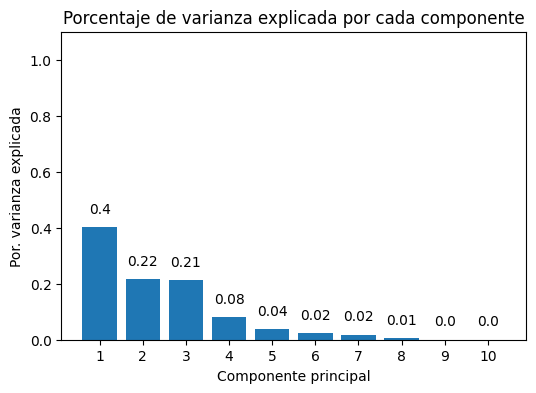

In [96]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(df_num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

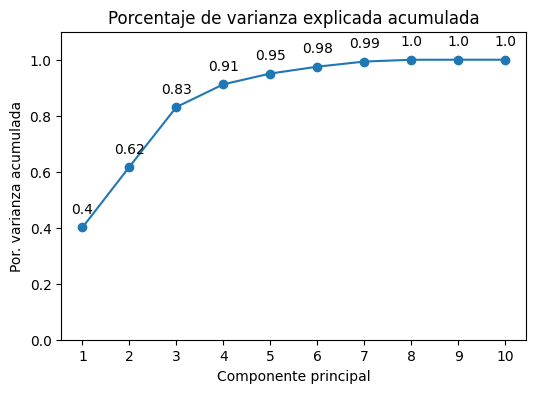

In [97]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df_num.columns)) + 1,
        prop_varianza_acum,
        marker = 'o')

for x, y in zip(np.arange(len(df_num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [100]:
df_num.head()

listing_type_id_bronze  listing_type_id_free  listing_type_id_gold  \
0                       1                     0                     0   
1                       0                     0                     0   
2                       1                     0                     0   
3                       0                     0                     0   
4                       1                     0                     0   

   listing_type_id_gold_premium  listing_type_id_gold_pro  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   listing_type_id_gold_special  listing_type_id_silver  \
0                             0                       0   
1                             0                       1   
2                             0                       0   
3                             0                       1   
4                             0                       0   

   available_quantity_False  price_norm  bin_class  
0                         1    0.007917          0  
1                         1    0.264939          1  
2                         1    0.005917          1  
3                         1    0.057921          0  
4                         1    0.002916          1

In [101]:
df_num.to_pickle(FOLDER + "df_num_norm.pkl")

### ACP para la variable "title"

In [43]:
df_text = pd.read_pickle(FOLDER + "df_text_clean_init.pkl")

In [44]:
# df_text = df_text.sample(45000)

In [45]:
len(df_text)

95955

In [46]:
df_text.tail()

title     Y  \
95950  [pastillas de freno ebc kawasaki kx 125 b2/c1/...   new   
95951  [el corazon de las tinieblas - conrad - biblio...  used   
95952  [juego de toalla y toallon franco valente vari...   new   
95953                           [campera de cuero negra]  used   
95954  [psicodrama y teatro moderno, jean fanchette. f2]  used   

                                             clean_text  
95950  [pastillas freno ebc kawasaki kx b2 c1 d1 83-85]  
95951           [corazon tinieblas conrad biblioteca x]  
95952     [juego toalla toallon franco valente colores]  
95953                             [campera cuero negra]  
95954     [psicodrama teatro moderno jean fanchette f2]

In [47]:
vectorizer = HashingVectorizer(n_features=8)

In [48]:
df_text["clean_text"] = [text[0] for text in df_text["clean_text"]]
df_text["title"] = [text[0] for text in df_text["title"]]
type(df_text["clean_text"].iloc[0])

str

In [49]:
df_text.tail()

title     Y  \
95950  pastillas de freno ebc kawasaki kx 125 b2/c1/d...   new   
95951  el corazon de las tinieblas - conrad - bibliot...  used   
95952  juego de toalla y toallon franco valente vario...   new   
95953                             campera de cuero negra  used   
95954    psicodrama y teatro moderno, jean fanchette. f2  used   

                                           clean_text  
95950  pastillas freno ebc kawasaki kx b2 c1 d1 83-85  
95951           corazon tinieblas conrad biblioteca x  
95952     juego toalla toallon franco valente colores  
95953                             campera cuero negra  
95954     psicodrama teatro moderno jean fanchette f2

In [50]:
bin_class = []
for i in range(len(df_text)):
    if df_text["Y"].iloc[i] == "new":
        bin_class.append(0)
    else:
        bin_class.append(1)               

In [51]:
df_text["label"] = bin_class

In [52]:
df_text.head()

title     Y  \
0  auriculares samsung originales manos libres ca...   new   
1  cuchillo daga acero carbón casco yelmo solinge...  used   
2        antigua revista billiken, n° 1826, año 1954  used   
3  alarma guardtex gx412 seguridad para el automo...   new   
4                          serenata - jennifer blake  used   

                                          clean_text  label  
0  auriculares samsung originales manos libres ca...      0  
1  cuchillo daga acero carbón casco yelmo solinge...      1  
2                    antigua revista billiken n° año      1  
3          alarma guardtex gx412 seguridad automotor      0  
4                            serenata jennifer blake      1

In [53]:
df_text.to_pickle(FOLDER + "df_text_clean.pkl")

In [67]:
tfidf = vectorizer.fit_transform(list(df_text["title"]))

In [68]:
tfidf_matrix = tfidf.toarray()

In [69]:
tfidf_matrix

array([[ 0.        ,  0.5       ,  0.        , ...,  0.5       ,
        -0.5       ,  0.        ],
       [ 0.        , -0.4472136 ,  0.        , ...,  0.4472136 ,
         0.        ,  0.4472136 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.81649658, -0.40824829],
       ...,
       [ 0.        ,  0.5       ,  0.        , ...,  0.        ,
         0.5       , -0.5       ],
       [ 0.        ,  0.        ,  0.40824829, ...,  0.        ,
         0.81649658,  0.        ],
       [ 0.81649658,  0.        ,  0.        , ...,  0.        ,
         0.40824829,  0.        ]])

In [70]:
df_tfidf = pd.DataFrame(tfidf_matrix)

In [71]:
df_tfidf.head()

0         1         2         3         4         5         6  \
0  0.000000  0.500000  0.000000  0.000000 -0.500000  0.500000 -0.500000   
1  0.000000 -0.447214  0.000000  0.447214  0.447214  0.447214  0.000000   
2  0.000000  0.000000  0.000000  0.408248  0.000000  0.000000 -0.816497   
3 -0.333333  0.333333 -0.333333 -0.333333  0.000000  0.333333  0.666667   
4  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   

          7  
0  0.000000  
1  0.447214  
2 -0.408248  
3  0.000000  
4  0.000000

In [72]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df_tfidf)
modelo_pca = pca_pipe.named_steps['pca']

In [73]:
pd.DataFrame(data=modelo_pca.components_,
             columns=df_tfidf.columns,
             index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

0         1         2         3         4         5         6  \
PC1 -0.003250 -0.025049 -0.016532  0.055285 -0.014751 -0.020913 -0.997592   
PC2  0.017480 -0.024781 -0.062253 -0.993201 -0.077064 -0.008620 -0.052187   
PC3  0.658218 -0.725630  0.127410  0.029781 -0.110600  0.018181  0.015475   
PC4  0.741893  0.666927 -0.060531  0.002796 -0.018825 -0.013747 -0.017667   
PC5  0.070021 -0.020027  0.353016 -0.091087  0.927995 -0.003061 -0.024306   
PC6  0.078967 -0.154487 -0.906278  0.033294  0.339759  0.109747  0.015093   
PC7  0.003763  0.029892  0.123734 -0.013142 -0.044979  0.973571 -0.020777   
PC8  0.069821 -0.047627  0.121175 -0.004828 -0.051208 -0.197673  0.016892   

            7  
PC1 -0.013711  
PC2  0.004569  
PC3  0.101434  
PC4  0.016610  
PC5  0.001791  
PC6 -0.140504  
PC7 -0.182522  
PC8 -0.967558

In [74]:
df_tfidf.tail()

0    1         2         3         4         5         6    7
95950  0.288675  0.0 -0.866025  0.000000 -0.288675  0.000000  0.288675  0.0
95951 -0.377964  0.0  0.000000  0.000000  0.377964 -0.377964  0.755929  0.0
95952  0.000000  0.5  0.000000  0.000000  0.500000  0.000000  0.500000 -0.5
95953  0.000000  0.0  0.408248  0.000000 -0.408248  0.000000  0.816497  0.0
95954  0.816497  0.0  0.000000 -0.408248  0.000000  0.000000  0.408248  0.0

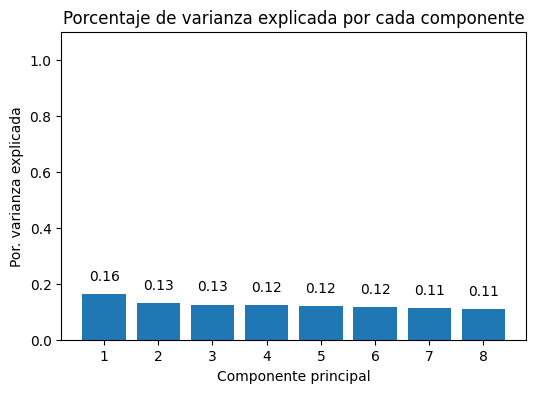

In [75]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(df_tfidf.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

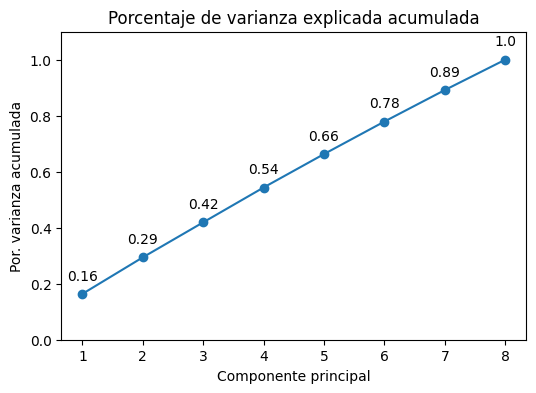

In [76]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df_tfidf.columns)) + 1,
        prop_varianza_acum,
        marker = 'o')

for x, y in zip(np.arange(len(df_tfidf.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [77]:
df_tfidf["Y"] = df_text["Y"]

In [78]:
df_tfidf.head()

0         1         2         3         4         5         6  \
0  0.000000  0.500000  0.000000  0.000000 -0.500000  0.500000 -0.500000   
1  0.000000 -0.447214  0.000000  0.447214  0.447214  0.447214  0.000000   
2  0.000000  0.000000  0.000000  0.408248  0.000000  0.000000 -0.816497   
3 -0.333333  0.333333 -0.333333 -0.333333  0.000000  0.333333  0.666667   
4  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   

          7     Y  
0  0.000000   new  
1  0.447214  used  
2 -0.408248  used  
3  0.000000   new  
4  0.000000  used

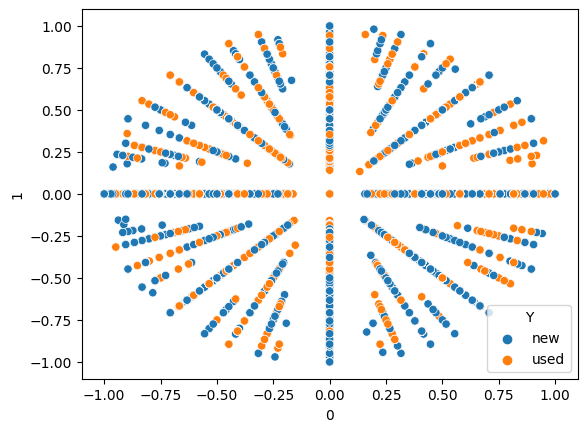

In [79]:
g =sns.scatterplot(x=0, y=1,
                  hue="Y",
                  data=df_tfidf);